In [3]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

Enter the path of your CSV file:- "C:\Users\Janit\Downloads\Iris (1).csv"


Sample of data:- 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa




removed 0 rows with missing values exceeding 30.0% threshold
Performing outlier handelling....
Outliers removed :) 



Overview of Data:- 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   1

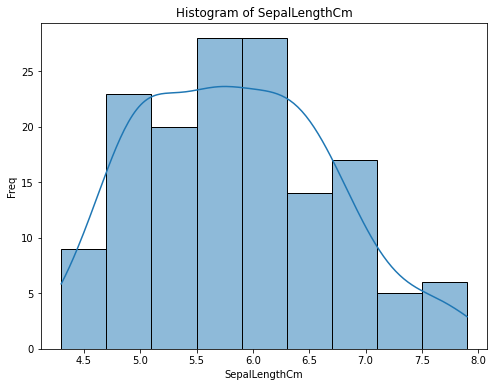

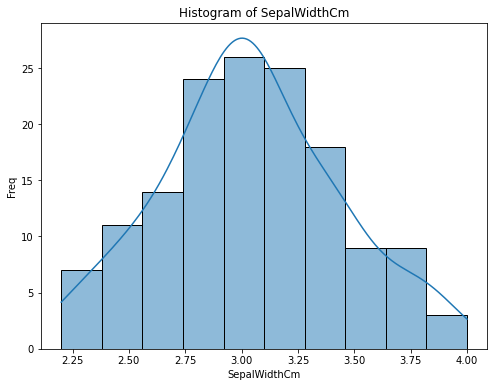

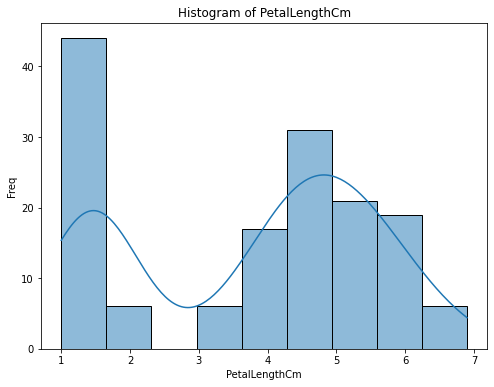

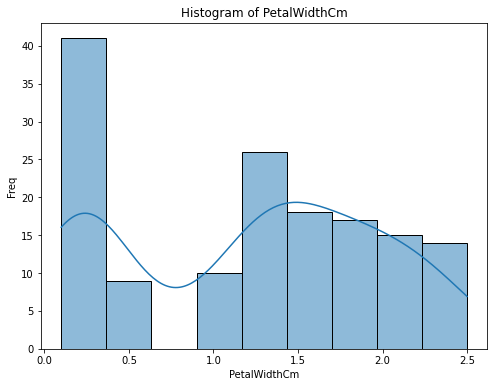

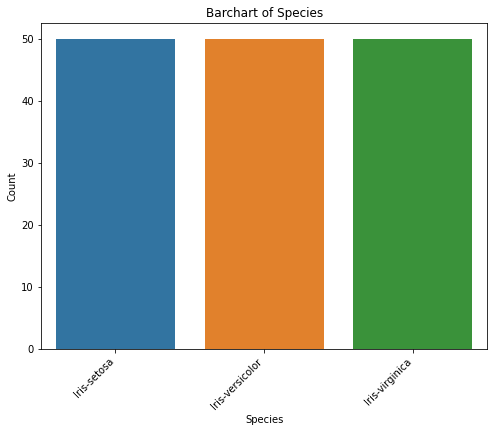

In [4]:
def analysisofdata(pathoffile, missthreshold = 0.3):
    pathoffile = pathoffile.strip('\"')
    try:
        data = pd.read_csv(pathoffile)
    except FileNotFoundError:
        print(f"Error: File '{pathoffile}' not found...")
        return
    except pd.errors.EmptyDataError:
        print(f"Error: File '{pathoffile}' is empty...")
        return
    except pd.errors.ParserError:
        print(f"Error: Unable to parse the CSV file'{pathoffile}' Please check the format...")
        return
    
    print("Sample of data:- ")
    print("=====================================================================")
    print(data.head())
    print("\n\n")
    
    rows = data.shape[0]
    data = data[data.isnull().sum(axis=1) / data.shape[1] <= missthreshold]
    removed_rows = rows - data.shape[0]
    
    print(f"\nremoved {removed_rows} rows with missing values exceeding {missthreshold * 100}% threshold")
    print("=====================================================================")
    print("=====================================================================")
    print("Performing outlier handelling....")
    n_columns = data.select_dtypes(['float64','int64']).columns
    for cx in n_columns:
        quar1 = data[cx].quantile(0.25)
        quar3 = data[cx].quantile(0.75)
        IQR = quar3- quar1
        lower_bound = quar1 - 1.5 * IQR
        upper_bound = quar3 + 1.5 * IQR
        
        data[cx] = data[cx].apply(lambda x: x if lower_bound <= x <= upper_bound else None)
    
    print("Outliers removed :) ")
    print("=====================================================================")
    print("\n\n")
    print("Overview of Data:- ")
    print("=====================================================================")
    print(data.info())
    print("\n\n")
    
    print("\nDescriptive stats of data:- ")
    print("=====================================================================")
    print(data.describe())
    print("\n\n")
    
    print("\nUnique values in each column:- ")
    print("=====================================================================")
    print(data.nunique())
    print("\n\n")
    
    
    print("\nCorrelation Matrix:- ")
    print("=====================================================================")
    print(data.corr())
    
    vizofdata(data)
    
    
def vizofdata(data):
    numerical_colms = data.select_dtypes('float64','int64').columns
    for c in numerical_colms:
        plt.figure(figsize = (8,6))
        sns.histplot(data[c],kde= True)
        plt.title(f"Histogram of {c}")
        plt.xlabel(c)
        plt.ylabel('Freq')
        plt.show()
        
    category_colms = data.select_dtypes(include=['object']).columns
    for c in category_colms:
        plt.figure(figsize = (8,6))
        sns.countplot(data= data, x=c)
        plt.title(f"Barchart of {c}")
        plt.xlabel(c)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha="right")
        plt.show()
    
    
    
    
if __name__ == "__main__":
    pathoffile = input("Enter the path of your CSV file:- ")
    print("\n")
    
    analysisofdata(pathoffile)
    
    